# Examen de Cinturón

## Datos Personales

* **Nombre Completo**: Felipe Gonzalez Garrido
* **ID Coding Dojo**: 80479
* **Track**: ADVANCED MACHINE LEARNING V22.1
* **Nombre del examen**: Detección de fraude
* **Intento**: 3

## Descripción del Problema

- La tarea es analizar la información de una tarjeta de crédito para predecir si una transacción fue fraudulenta o no.

## Solución

###Librerias a utilizar

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import plot_confusion_matrix 
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### I.- Análisis Exploratorio

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.duplicated().sum()

1081

In [ ]:
df = df[~df.duplicated()]

**En resumen, nuestro conjunto de datos cuenta con:**

- 284807 registros

- 31 columnas

- 0 valores nulos

- 1081 registros duplicados, estos fueron ignorados para evitar sesgos en el analisis.

### II.- Visualizaciones


In [ ]:
df2 = df.copy()#Copia de dataframe para resguardar data original
df2["Class"].replace({1:"Fraude",0:"Normal"}, inplace=True)

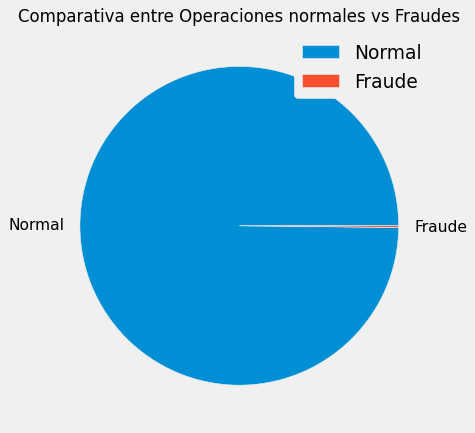

In [ ]:
df2["Class"].value_counts().plot(kind="pie",legend=" ")
plt.ylabel("")
plt.title("Comparativa entre Operaciones normales vs Fraudes", fontsize= 15);

* Es posible apreciar que la cantidad de fraudes ocurridos, es minima en comparacion al total de transacciones realizadas con normalidad. 
* En cuanto a numeros, se trata de 283253 operaciones hechas con normalidad vs. 473 Fraudes.

In [ ]:
df2["Class"].value_counts()

Normal    283253
Fraude       473
Name: Class, dtype: int64

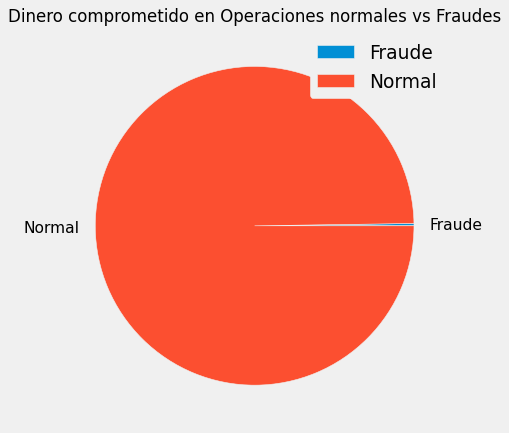

In [ ]:
df2.groupby("Class")["Amount"].sum().plot(kind="pie",legend=" ")
plt.ylabel("")
plt.title("Dinero comprometido en Operaciones normales vs Fraudes", fontsize= 15);

- En cuanto al dinero comprometido en estas operaciones, se mantiene una razon bastante similar.
- las operaciones fraudulentas suman un total de 58591 dolares.

In [ ]:
df2.groupby("Class")["Amount"].sum()

Class
Fraude       58591.39
Normal    25043410.29
Name: Amount, dtype: float64

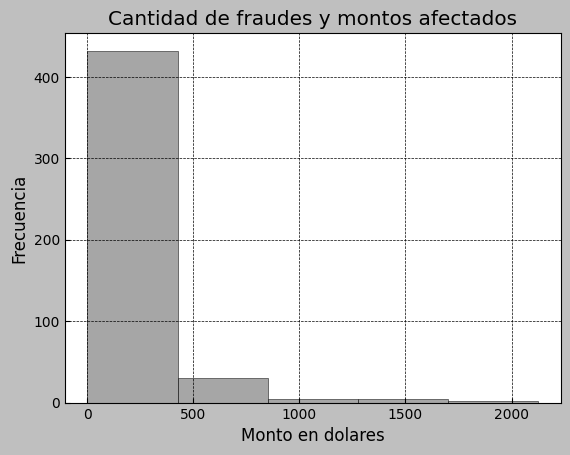

In [ ]:
fraude = df["Class"] == 1
plt.style.use("grayscale")
df[fraude]["Amount"].plot(kind="hist", alpha=0.7, color="gray", edgecolor="black",bins=5)
plt.xlabel("Monto en dolares")
plt.ylabel("Frecuencia")
plt.title("Cantidad de fraudes y montos afectados");

- Es posible apreciar una gran concentracion de fraudes por menos de 400 dolares, tendencia que disminuye drasticamente hasta llegar a los 2000 dolares aproximadamente.
- Esta tendencia puede ser un posible "modus operandi" para evitar levantar mayor sospecha en las transancciones.

### Preprocesamiento de datos

- En esta ocasion, al tratarse de datos numericos limpios. Solo sera necesario la aplicacion de un escalador y el modelo de validacion para su modelado en machine learning.
- Tampoco se opta por reduccion de dimensionalidad puesto que esta ya fue aplicada a las caracteristicas del conjunto de datos.

In [ ]:
X = df.drop(columns ="Class")
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split( X,y, random_state=42)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.53529559,  0.35176206, -0.50079549, ..., -0.13882583,
         0.10965825,  0.50720799],
       [-1.19865435, -0.56663492,  0.62453953, ...,  0.69914344,
         0.61212475, -0.28952286],
       [ 1.0089179 ,  1.00615952, -0.37035759, ..., -0.0777069 ,
        -0.19692383, -0.31674647],
       ...,
       [-0.31172566,  0.6458217 , -0.02896951, ...,  0.11077403,
         0.07515426, -0.33552275],
       [-0.13162355,  1.01866598, -0.08081096, ..., -0.1861791 ,
        -0.17256979, -0.19548132],
       [-0.38384652, -0.24273786,  0.50072703, ..., -0.33570689,
        -0.14781419, -0.35353837]])

### III.- Modelos de Machine Learning


**Modelo neuronal**

In [ ]:
input_shape = X_train.shape[1]
input_shape

30

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(30, input_dim = input_shape,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics = ['acc'])
history = model.fit(X_train_scaled, y_train,
                    validation_data = (X_test_scaled, y_test), 
                    epochs=10)

Epoch 1/10
6650/6650 [==============================] - 24s 3ms/step - loss: 0.0236 - acc: 0.9982 - val_loss: 0.0122 - val_acc: 0.9984
Epoch 2/10
6650/6650 [==============================] - 23s 3ms/step - loss: 0.0127 - acc: 0.9983 - val_loss: 0.0121 - val_acc: 0.9984
Epoch 3/10
6650/6650 [==============================] - 23s 3ms/step - loss: 0.0126 - acc: 0.9983 - val_loss: 0.0119 - val_acc: 0.9984
Epoch 4/10
6650/6650 [==============================] - 23s 3ms/step - loss: 0.0126 - acc: 0.9983 - val_loss: 0.0118 - val_acc: 0.9984
Epoch 5/10
6650/6650 [==============================] - 21s 3ms/step - loss: 0.0126 - acc: 0.9983 - val_loss: 0.0118 - val_acc: 0.9984
Epoch 6/10
6650/6650 [==============================] - 21s 3ms/step - loss: 0.0126 - acc: 0.9983 - val_loss: 0.0119 - val_acc: 0.9984
Epoch 7/10
6650/6650 [==============================] - 23s 3ms/step - loss: 0.0127 - acc: 0.9983 - val_loss: 0.0118 - val_acc: 0.9984
Epoch 8/10
6650/6650 [==============================] -

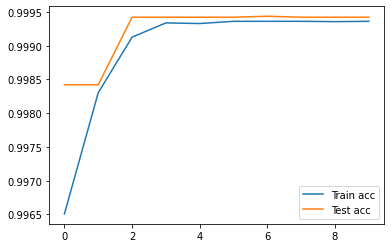

In [ ]:
plt.plot(history.history['acc'], label='Train acc')
plt.plot(history.history['val_acc'], label='Test acc')
plt.legend();

In [ ]:
model.evaluate(X_test_scaled, y_test)

2217/2217 [==============================] - 4s 2ms/step - loss: 0.0038 - acc: 0.9994


[0.0037895399145781994, 0.9994219541549683]

In [ ]:
test = model.predict(X_test_scaled)

2217/2217 [==============================] - 6s 3ms/step


**Si bien el rendimiento del modelo neuronal es bastante bueno, este es superado por el modelo random forest classifier.**

**Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
rf_test_score = rf.score(X_test_scaled, y_test)
print(rf_test_score)

0.9995206676817233




- Con respecto a la optimizacion de hyperparametros, se opto por no realizarlos puesto que el resultado por defecto con la semilla determinada fue positivo, ademas que el proceso de iteracion para encontrar el max_depth optimo tardaria demasiado.

**Viendo el excelente rendimiento del modelo random forest, crearemos una matriz de confusion para ver en detalle los valores acertados.**


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


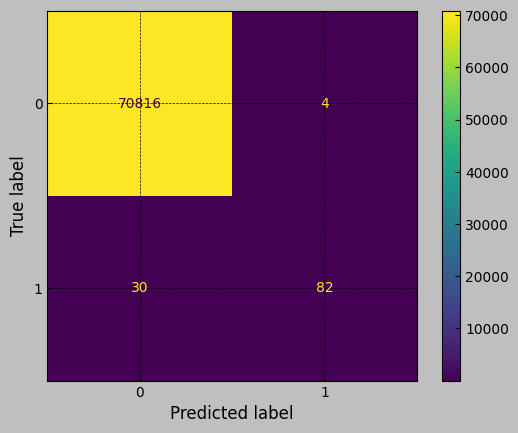

In [ ]:
rf_confusion = plot_confusion_matrix(rf, X_test_scaled ,y_test);

Viendo los resultados de forma grafica, podemos apreciar la exactitud del modelo de random forest al procesar el conjunto de datos.

**valores acertados:**

> 70816: Transacciones seguras

> 82: Transacciones Fraudulentas

**valores erroneos**

> 4: Falsos positivos

> 30: Falsos negativos

## Conclusiones


- Nuestro modelo a utilizar para esta problematica es el clasificador **RandomForest** puesto que, aparte de arrojar resultados excelentes. Nos fue posible verlos graficamente.
- Al poder ver graficamente los resultados, sera posible tomar acciones de marketing o seguridad, recalcando tanto nuestra prevencion de fraudes como la seguridad en las transacciones.
- Con respecto a los falsos negativos, que serian el peor de los casos en cuanto a la prediccion hecha, es imperativo la aplicacion de herramientas de monitoreo en tiempo real para mitigar cualquier daño economico al cliente.

## Referencias

* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* [Plataforma CodingDojo-DataScience](https://login.codingdojo.com/)